In [ ]:
data_link='https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption'

In [ ]:
fiel_path="https://drive.google.com/file/d/10srb_7Vc1JY38zirs59f5kjBRrNDqTFl/view?usp=drive_link"

In [1]:
!pip install gdown

In [2]:
import gdown


file_id = '10srb_7Vc1JY38zirs59f5kjBRrNDqTFl'
output_path = 'individual+household+electric+power+consumption.txt'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_path, fuzzy=True)

# Read the downloaded CSV file into a pandas DataFrame


Downloading...
From: https://drive.google.com/uc?id=10srb_7Vc1JY38zirs59f5kjBRrNDqTFl
To: /content/individual+household+electric+power+consumption.txt
100%|██████████| 20.6M/20.6M [00:00<00:00, 26.1MB/s]


'individual+household+electric+power+consumption.txt'

In [3]:

!unzip individual+household+electric+power+consumption.txt

Archive:  individual+household+electric+power+consumption.txt
  inflating: household_power_consumption.txt  


## load the data

In [4]:
# let's import neccessary data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 1. READ .txt directly (semicolon-separated)
df = pd.read_csv('household_power_consumption.txt',
                 sep=';',  # Key: semicolon delimiter
                 parse_dates={'datetime': [0,1]},  # Combine Date + Time
                 infer_datetime_format=True,
                 low_memory=False,
                 na_values=['nan','?'])

# 2. SAVE as clean .csv (2 seconds)
df.to_csv('household_power_consumption.csv', index=False)
print("✓ Converted to CSV:", df.shape)  # (2M rows, 9 cols)


/tmp/ipython-input-1145178496.py:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.txt',
/tmp/ipython-input-1145178496.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.txt',
/tmp/ipython-input-1145178496.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('household_power_consumption.txt',


✓ Converted to CSV: (2075259, 8)


In [6]:
df.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [7]:
df.shape

(2075259, 8)

In [8]:
# let's dropna if the target column is nan
df.dropna(subset=['Global_active_power'], inplace=True)

In [9]:
df.dtypes

,0
datetime,datetime64[ns]
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64


## feature engineering

let's change the minute level data set into hourly

In [10]:
df.set_index('datetime', inplace=True)

df_hourly = df.resample('H').agg({
    'Voltage': 'mean',
    'Global_intensity': 'mean',

    # Reactive & Active Power (kW) → convert to kWh
    'Global_active_power': lambda x: x.sum() / 60,
    'Global_reactive_power': lambda x: x.sum() / 60,

    # Sub-metering (Wh energy) → sum directly (do NOT divide)
    'Sub_metering_1': 'sum',
    'Sub_metering_2': 'sum',
    'Sub_metering_3': 'sum'
})

df_hourly = df_hourly.dropna()
print(df_hourly.shape)


/tmp/ipython-input-3621803575.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').agg({


(34168, 7)


In [11]:
# export processed csv file for feature use
df_hourly.to_csv('df_hourly.csv')

In [12]:
df_hourly.head()

,Voltage,Global_intensity,Global_active_power,Global_reactive_power,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:00:00,234.643889,18.100000,2.533733,0.137400,0.0,19.0,607.0
2006-12-16 18:00:00,234.580167,15.600000,3.632200,0.080033,0.0,403.0,1012.0
2006-12-16 19:00:00,233.232500,14.503333,3.400233,0.085233,0.0,86.0,1001.0
2006-12-16 20:00:00,234.071500,13.916667,3.268567,0.075100,0.0,0.0,1007.0
2006-12-16 21:00:00,237.158667,13.046667,3.056467,0.076667,0.0,25.0,1033.0


In [13]:
df_hourly['Other_Consumption'] = (df['Global_active_power'] * 1000 / 60) \
                           - df['Sub_metering_1'] \
                           - df['Sub_metering_2'] \
                           - df['Sub_metering_3']

# Replace negatives (caused by noise) with 0
df_hourly['Other_Consumption'] = df_hourly['Other_Consumption'].clip(lower=0)


In [14]:
df_hourly['lag1'] = df_hourly['Global_active_power'].shift(1)   # previous hour
df_hourly['lag24'] = df_hourly['Global_active_power'].shift(24) # same hour yesterday
df_hourly['lag168'] = df_hourly['Global_active_power'].shift(168) # same hour last week

# drop first 168 rows with NaNs
df_hourly = df_hourly.dropna()


let's create rolling/windows

In [15]:
ROLL_WINDOWS = [3, 6, 12, 24, 48, 72, 96, 168]


In [16]:
ROLL_WINDOWS = [3, 6, 12, 24, 48, 72, 96, 168]

TARGET_COLS = [
    'Global_active_power',
    'Global_reactive_power',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3',
    'Other_Consumption'
]

for col in TARGET_COLS:
    for w in ROLL_WINDOWS:

        df_hourly[f'{col}_roll{w}_mean'] = (
            df_hourly[col].rolling(window=w).mean()
        )

        df_hourly[f'{col}_roll{w}_std'] = (
            df_hourly[col].rolling(window=w).std()
        )

        df_hourly[f'{col}_roll{w}_sum'] = (
            df_hourly[col].rolling(window=w).sum()
        )

df_hourly.dropna(inplace=True)


/tmp/ipython-input-2431922992.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_hourly[f'{col}_roll{w}_sum'] = (
/tmp/ipython-input-2431922992.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_hourly[f'{col}_roll{w}_mean'] = (
/tmp/ipython-input-2431922992.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfra

let's create time based features

In [17]:
df_hourly = df_hourly.copy()
df_hourly['datetime'] = df_hourly.index


In [18]:
df_hourly['hour'] = df_hourly['datetime'].dt.hour
df_hourly['day'] = df_hourly['datetime'].dt.day
df_hourly['weekday'] = df_hourly['datetime'].dt.weekday  # 0=Mon
df_hourly['weekofyear'] = df_hourly['datetime'].dt.isocalendar().week.astype(int)
df_hourly['month'] = df_hourly['datetime'].dt.month
df_hourly['year'] = df_hourly['datetime'].dt.year


##train/test split

In [19]:
# Last N days for test
N = 60 * 24 # 60-day test window

train = df_hourly.iloc[:-N]
test  = df_hourly.iloc[-N:]


In [20]:
X_train=train.drop(['Global_active_power','datetime'],axis=1)
y_train=train['Global_active_power']

X_test=train.drop(['Global_active_power','datetime'],axis=1)
y_test=train['Global_active_power']

In [21]:
X_train.shape

(32378, 160)

In [22]:
df_hourly.columns

Index(['Voltage', 'Global_intensity', 'Global_active_power',
       'Global_reactive_power', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Other_Consumption', 'lag1', 'lag24',
       ...
       'Other_Consumption_roll168_mean', 'Other_Consumption_roll168_std',
       'Other_Consumption_roll168_sum', 'datetime', 'hour', 'day', 'weekday',
       'weekofyear', 'month', 'year'],
      dtype='object', length=162)

## train xgboost model

In [23]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror'
)

model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE on last 30 days:", rmse)


RMSE on last 30 days: 0.012776877062068065


In [25]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test,y_pred)*100

In [26]:
mape

1.3476429139982358

In [27]:
y_pred_series = pd.Series(y_pred, index=y_test.index, name='predicted')


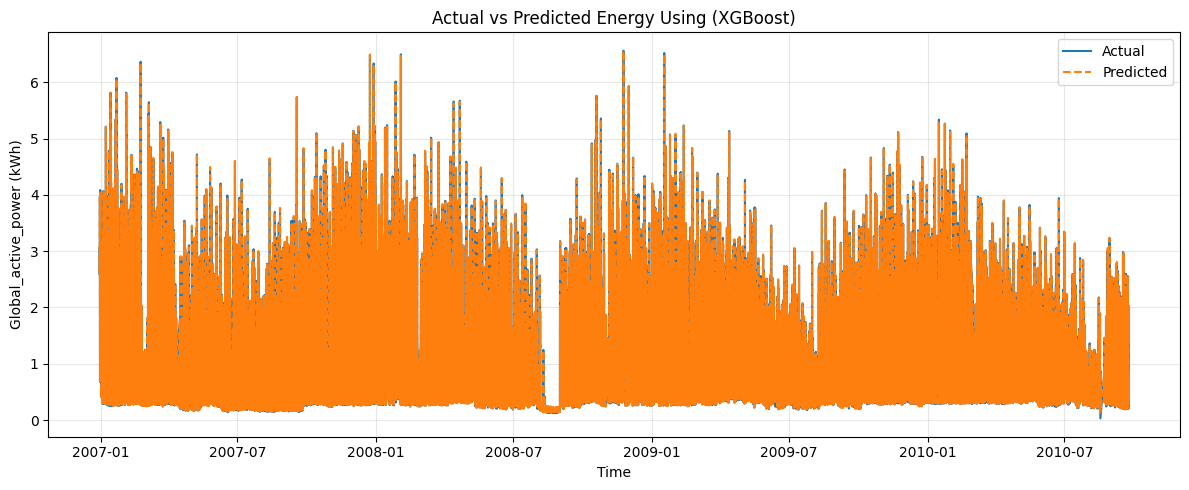

In [39]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label='Actual', color='C0')
plt.plot(y_pred_series.index, y_pred_series, label='Predicted', color='C1', linestyle='--')
plt.title('Actual vs Predicted Energy Using (XGBoost)')
plt.xlabel('Time')
plt.ylabel('Global_active_power (kWh)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('actual_vs_predicted-using-xgboost1.png')
plt.show()


## creating feature data frame


In [30]:
df_hourly.index.max()

Timestamp('2010-11-26 21:00:00')

In [31]:
# create feature data frame
feature=pd.date_range('2010-11-26 21:00:00','2010-12-26 21:00:00',
                             freq='1H')
feature_df=pd.DataFrame(index=feature)
feature_df.head()

/tmp/ipython-input-371314969.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  feature=pd.date_range('2010-11-26 21:00:00','2010-12-26 21:00:00',


""
2010-11-26 21:00:00
2010-11-26 22:00:00
2010-11-26 23:00:00
2010-11-27 00:00:00
2010-11-27 01:00:00


In [32]:
feature_df['is_feature']=True
df_hourly['is_feature']=False
df_all=pd.concat([df_hourly,feature_df])


In [33]:
# Step 5: Add rolling features for only historical data
# -------------------------------
ROLL_WINDOWS = [3, 6, 12, 24, 48, 72, 96, 168]
TARGET_COLS = [
    'Global_active_power',
    'Global_reactive_power',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3',
    'Other_Consumption'
]

for col in TARGET_COLS:
    for w in ROLL_WINDOWS:
        # rolling mean, std, sum from last window
        df_hourly [f'{col}_roll{w}_mean'] = df_hourly[col].iloc[-w:].mean()
        df_hourly [f'{col}_roll{w}_std'] = df_hourly[col].iloc[-w:].std()
        df_hourly[f'{col}_roll{w}_sum'] = df_hourly[col].iloc[-w:].sum()

# Lags for only historical data
df_hourly['lag1'] = df_hourly['Global_active_power'].shift(1)
df_hourly['lag24'] = df_hourly['Global_active_power'].shift(24)
df_hourly['lag168'] = df_hourly['Global_active_power'].shift(168)


In [34]:
df_all['hour'] = df_all.index.hour
df_all['day'] = df_all.index.day
df_all['weekday'] = df_all.index.weekday
df_all['weekofyear'] = df_all.index.isocalendar().week.astype(int)
df_all['month'] = df_all.index.month
df_all['year'] = df_all.index.year


In [35]:
future_preds = []
last = df_hourly.iloc[-1].copy()
FEATURES = X_train.columns.tolist()


for i in range(168):

    # Prepare features
    X = last[FEATURES]



    yhat = model.predict([X])[0]
    future_preds.append(yhat)

    # Update lags
    last['lag168'] = last['lag24']
    last['lag24'] = last['lag1']
    last['lag1'] = yhat

    # Update rolling windows (example 24h)
    past_vals = df_hourly['Global_active_power'].tolist()[-23:] + [yhat]
    last['Global_active_power_roll24_mean'] = np.mean(past_vals)
    last['Global_active_power_roll24_std'] = np.std(past_vals)

    # Update time
    next_time = last.name + pd.Timedelta(hours=1)
    last.name = next_time
    last['hour'] = next_time.hour
    last['day'] = next_time.day
    last['weekday'] = next_time.weekday()
    last['month'] = next_time.month
    last['year'] = next_time.year

    # append to df_all
    df_all.loc[next_time, 'Global_active_power'] = yhat


In [36]:
future_w_features = df_all.query('is_feature').copy()

In [37]:
future_w_features['pred'] = model.predict(future_w_features[FEATURES])

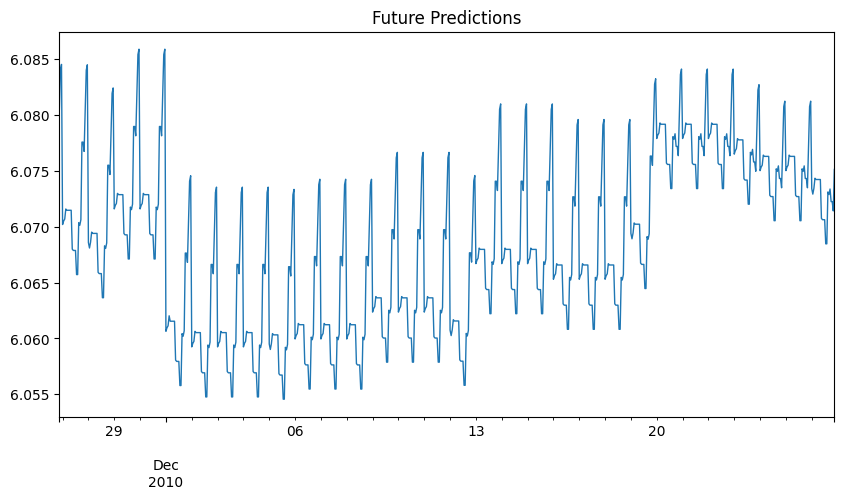

In [40]:
future_w_features['pred'].plot(figsize=(10, 5),
                              #  color=color_pal[4],
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.savefig('future_predictions-using-xgboost1.png')
plt.show()

In [41]:
import joblib
joblib.dump(model, 'xgboost_model1.pkl')

['xgboost_model1.pkl']

In [43]:
# this is the trained model
model.save_model("xgb_model1.json")


##Final Recommended Time Feature Code (All-in-One)

In [ ]:
df_hourly = df_hourly.copy()
df_hourly['datetime'] = df_hourly.index

# Basic time features
df_hourly['hour'] = df_hourly['datetime'].dt.hour
df_hourly['day'] = df_hourly['datetime'].dt.day
df_hourly['weekday'] = df_hourly['datetime'].dt.weekday
df_hourly['weekofyear'] = df_hourly['datetime'].dt.isocalendar().week.astype(int)
df_hourly['month'] = df_hourly['datetime'].dt.month
df_hourly['year'] = df_hourly['datetime'].dt.year

# Cyclical encodings
df_hourly['hour_sin'] = np.sin(2 * np.pi * df_hourly['hour'] / 24)
df_hourly['hour_cos'] = np.cos(2 * np.pi * df_hourly['hour'] / 24)

df_hourly['weekday_sin'] = np.sin(2 * np.pi * df_hourly['weekday'] / 7)
df_hourly['weekday_cos'] = np.cos(2 * np.pi * df_hourly['weekday'] / 7)

df_hourly['month_sin'] = np.sin(2 * np.pi * df_hourly['month'] / 12)
df_hourly['month_cos'] = np.cos(2 * np.pi * df_hourly['month'] / 12)

# Weekend indicator
df_hourly['is_weekend'] = (df_hourly['weekday'] >= 5).astype(int)

# Part of day
df_hourly['part_of_day'] = df_hourly['hour'].apply(
    lambda h: 0 if h < 6 else (1 if h < 12 else (2 if h < 18 else 3))
)
